In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("IM_after_preproc.csv")

In [3]:
#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['IM']==1].iloc[:, 1:]
df_heartattack_y = df[df['IM']==1].iloc[:, 0]
df_no_heartattack_x = df[df['IM']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['IM']==0].iloc[:, 0]

df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

In [6]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from tqdm import tqdm

iter_max_depth = list(range(6, 14))
iter_n_estimators = list(range(100, 800, 50))

#все возможные комбинации параметров
a = [iter_n_estimators, iter_max_depth]
iters = [list(x) for x in np.array(np.meshgrid(*a)).T.reshape(-1,len(a))]#все возможные комбинации параметров

results = {'iter_n_estimators':[], 'iter_max_depth':[],
            'train_recall_score':[], 'train_f1_score':[], 'train_precision_score':[],
            'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
for i in tqdm(iters):
        model = CatBoostClassifier(n_estimators=i[0], depth=i[1], learning_rate=1, loss_function='Logloss', verbose=False)
        model.fit(x_train, y_train)
        test_y_pred = model.predict(x_test)
        train_y_pred = model.predict(x_train)
        results['iter_n_estimators'].append(i[0])
        results['iter_max_depth'].append(i[1])
        results['train_recall_score'].append(recall_score(y_train, train_y_pred))
        results['train_f1_score'].append(f1_score(y_train, train_y_pred))
        results['train_precision_score'].append(precision_score(y_train, train_y_pred))
        results['test_recall_score'].append(recall_score(y_test, test_y_pred))
        results['test_f1_score'].append(f1_score(y_test, test_y_pred))
        results['test_precision_score'].append(precision_score(y_test, test_y_pred))

100%|██████████| 112/112 [29:02<00:00, 15.56s/it]


In [7]:
df_results=pd.DataFrame(results)
df_results

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,6,1.0,1.0,1.0,0.550,0.676923,0.880000
1,100,7,1.0,1.0,1.0,0.625,0.714286,0.833333
2,100,8,1.0,1.0,1.0,0.550,0.666667,0.846154
3,100,9,1.0,1.0,1.0,0.650,0.722222,0.812500
4,100,10,1.0,1.0,1.0,0.575,0.696970,0.884615
...,...,...,...,...,...,...,...,...
107,750,9,1.0,1.0,1.0,0.650,0.722222,0.812500
108,750,10,1.0,1.0,1.0,0.600,0.716418,0.888889
109,750,11,1.0,1.0,1.0,0.600,0.727273,0.923077
110,750,12,1.0,1.0,1.0,0.600,0.727273,0.923077


In [8]:
df_results[df_results['test_recall_score']==df_results['test_recall_score'].max()]

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
3,100,9,1.0,1.0,1.0,0.65,0.722222,0.81250
11,150,9,1.0,1.0,1.0,0.65,0.722222,0.81250
19,200,9,1.0,1.0,1.0,0.65,0.722222,0.81250
27,250,9,1.0,1.0,1.0,0.65,0.722222,0.81250
33,300,7,1.0,1.0,1.0,0.65,0.732394,0.83871
35,300,9,1.0,1.0,1.0,0.65,0.722222,0.81250
41,350,7,1.0,1.0,1.0,0.65,0.732394,0.83871
43,350,9,1.0,1.0,1.0,0.65,0.722222,0.81250
49,400,7,1.0,1.0,1.0,0.65,0.732394,0.83871
51,400,9,1.0,1.0,1.0,0.65,0.722222,0.81250


In [9]:
df_results[df_results['test_precision_score']==df_results['test_precision_score'].max()]

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
54,400,12,1.0,1.0,1.0,0.6,0.727273,0.923077
62,450,12,1.0,1.0,1.0,0.6,0.727273,0.923077
70,500,12,1.0,1.0,1.0,0.6,0.727273,0.923077
78,550,12,1.0,1.0,1.0,0.6,0.727273,0.923077
86,600,12,1.0,1.0,1.0,0.6,0.727273,0.923077
94,650,12,1.0,1.0,1.0,0.6,0.727273,0.923077
102,700,12,1.0,1.0,1.0,0.6,0.727273,0.923077
109,750,11,1.0,1.0,1.0,0.6,0.727273,0.923077
110,750,12,1.0,1.0,1.0,0.6,0.727273,0.923077


In [10]:
df_results[df_results['test_f1_score']==df_results['test_f1_score'].max()]

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
33,300,7,1.0,1.0,1.0,0.65,0.732394,0.83871
41,350,7,1.0,1.0,1.0,0.65,0.732394,0.83871
49,400,7,1.0,1.0,1.0,0.65,0.732394,0.83871
57,450,7,1.0,1.0,1.0,0.65,0.732394,0.83871
65,500,7,1.0,1.0,1.0,0.65,0.732394,0.83871
73,550,7,1.0,1.0,1.0,0.65,0.732394,0.83871
81,600,7,1.0,1.0,1.0,0.65,0.732394,0.83871
89,650,7,1.0,1.0,1.0,0.65,0.732394,0.83871
97,700,7,1.0,1.0,1.0,0.65,0.732394,0.83871
105,750,7,1.0,1.0,1.0,0.65,0.732394,0.83871


In [14]:
df_results.iloc[33]

iter_n_estimators        300.000000
iter_max_depth             7.000000
train_recall_score         1.000000
train_f1_score             1.000000
train_precision_score      1.000000
test_recall_score          0.650000
test_f1_score              0.732394
test_precision_score       0.838710
Name: 33, dtype: float64

[[76  5]
 [14 26]] 
 roc_auc_score 0.8808641975308642
 rec: 0.65
 prec: 0.8387096774193549
 f1: 0.7323943661971831



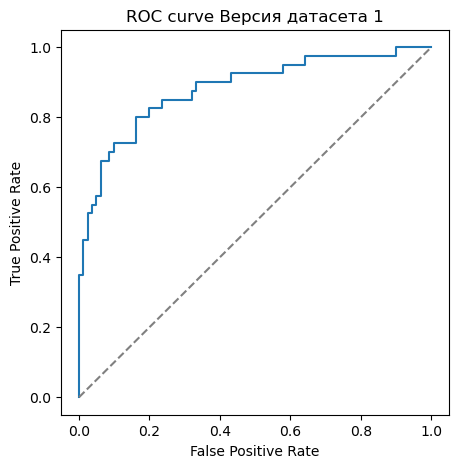

In [15]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
model = CatBoostClassifier(n_estimators=300, depth=7, learning_rate=1, loss_function='Logloss', verbose=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
y_proba = y_proba[:, 1]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), '\n', 
f'roc_auc_score {roc_auc_score(y_test, y_proba)}\n', 
f'rec: {recall_score(y_test, y_pred)}\n',
f'prec: {precision_score(y_test, y_pred)}\n',
f'f1: {f1_score(y_test, y_pred)}\n',
)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Версия датасета 1')
plt.show()

[[320   0]
 [  0 159]] 
 roc_auc_score 1.0
 rec: 1.0
 prec: 1.0
 f1: 1.0



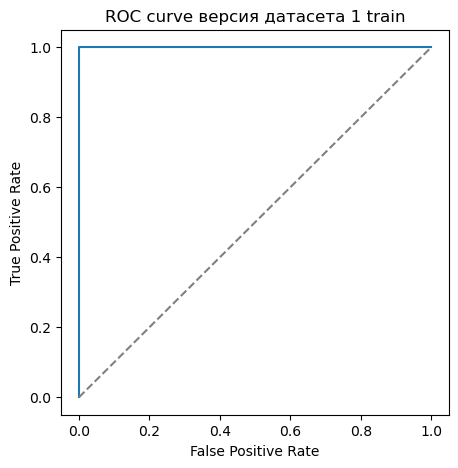

In [16]:
#результаты по тренировочным
y_pred = model.predict(x_train)
y_proba = model.predict_proba(x_train)
y_proba = y_proba[:, 1]
print(confusion_matrix(y_train, y_pred), '\n', 
f'roc_auc_score {roc_auc_score(y_train, y_proba)}\n', 
f'rec: {recall_score(y_train, y_pred)}\n',
f'prec: {precision_score(y_train, y_pred)}\n',
f'f1: {f1_score(y_train, y_pred)}\n',
)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_proba, pos_label=1)
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve версия датасета 1 train')
plt.show()

Подбор порога

In [17]:
from tqdm import tqdm

prediction = model.predict_proba(x_test)
threshold_results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()
iters = np.unique(iters)

for i in tqdm(iters[:300]):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    threshold_results['threshold'].append(i)
    threshold_results['test_recall_score'].append(recall_score(y_test, predict_mine))
    threshold_results['test_f1_score'].append(f1_score(y_test, predict_mine))
    threshold_results['test_precision_score'].append(precision_score(y_test, predict_mine))

 95%|█████████▌| 114/120 [00:00<00:00, 278.83it/s]e:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 120/120 [00:00<00:00, 276.67it/s]


In [18]:
df_threshold_results = pd.DataFrame(threshold_results)
df_threshold_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.000004,1.000,0.500000,0.333333
1,0.000004,1.000,0.503145,0.336134
2,0.000011,1.000,0.506329,0.338983
3,0.000012,1.000,0.509554,0.341880
4,0.000019,1.000,0.512821,0.344828
...,...,...,...,...
115,0.999933,0.100,0.181818,1.000000
116,0.999955,0.075,0.139535,1.000000
117,0.999975,0.050,0.095238,1.000000
118,0.999976,0.025,0.048780,1.000000


Text(0, 0.5, 'метрика')

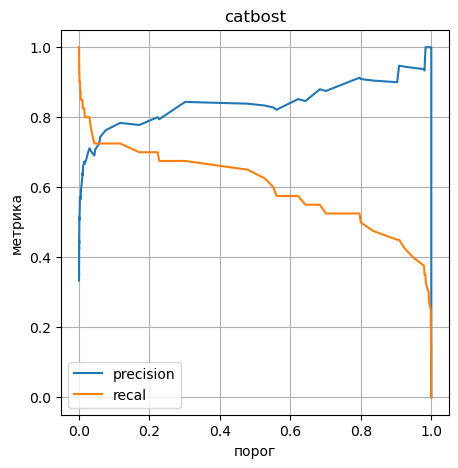

In [19]:
import matplotlib.pyplot as plt
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_precision_score'], label='precision')
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_recall_score'], label='recal')
plt.grid()
plt.legend()
plt.title('catbost')
plt.xlabel('порог')
plt.ylabel('метрика')

In [36]:
df_threshold_results.iloc[75]#вручную искал

threshold               0.029650
test_recall_score       0.800000
test_f1_score           0.752941
test_precision_score    0.711111
Name: 75, dtype: float64

Кросвалидация нормализованых данных

In [53]:
from sklearn.model_selection import cross_validate
from catboost import CatBoostClassifier
scoring = ['precision_macro', 'recall_macro']
clf = CatBoostClassifier(n_estimators=300, depth=7, learning_rate=1, loss_function='Logloss', verbose=False)
scores = cross_validate(clf, df.iloc[:, 1:], df.iloc[:, 0], scoring=scoring)

In [54]:
scores

{'fit_time': array([1.88584065, 1.49907541, 1.09532547, 1.31419158, 1.42165732]),
 'score_time': array([0.00599599, 0.0039978 , 0.00399733, 0.0039978 , 0.00499582]),
 'test_precision_macro': array([0.82288699, 0.83437827, 0.8968254 , 0.82288699, 0.78590375]),
 'test_recall_macro': array([0.81875   , 0.8       , 0.875     , 0.81875   , 0.73884141])}

In [55]:
scores['test_recall_macro'].mean()

0.8102682811016144

In [56]:
scores['test_precision_macro'].mean()

0.8325762785532902

Собственно разницы нет потомучто нормализация и масштабирование важны для линейных моделей, а для деревянных и бустингов она что есть, что ее нет

In [57]:
#Сохраню конечную модель
model = CatBoostClassifier(n_estimators=40, depth=5, learning_rate=1, loss_function='Logloss', verbose=False)
model.fit(df.iloc[:, 1:], df.iloc[:, 0])

import pickle
pickle.dump(model, open('catboost_model.sav', 'wb'))